In [25]:
import os.path as osp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
# Households
base_solar = osp.join('useful_solar', 'run_household_solar_1')
grid = osp.join(base_solar, 'gridbalance2016.csv')
solar = osp.join(base_solar, 'power2016_solar_module.csv')
household = osp.join(base_solar, 'power2016Household.csv')
griddata = pd.read_csv(grid)
solardata = pd.read_csv(solar)
householddata = pd.read_csv(household)

In [134]:
weather = pd.read_csv("Weather-AMS/Climate240.csv", usecols=[1, 2, 5, 9, 10], skiprows=27, parse_dates=[1], index_col=1)

In [135]:
weather

,Local [],Wind [m/s],Diffuse [W/m^2],Direct [W/m^2]
Irradiation [W/m^2],,,,
0,0000-01-01 00:30:00,5.528,0,0
0,0000-01-01 01:30:00,5.487,0,0
0,0000-01-01 02:30:00,5.659,0,0
0,0000-01-01 03:30:00,5.739,0,0
0,0000-01-01 04:30:00,5.553,0,0
0,0000-01-01 05:30:00,5.736,0,0
0,0000-01-01 06:30:00,5.615,0,0
0.231,0000-01-01 07:30:00,5.508,0.231,0
12.601,0000-01-01 08:30:00,5.475,12.281,0.321


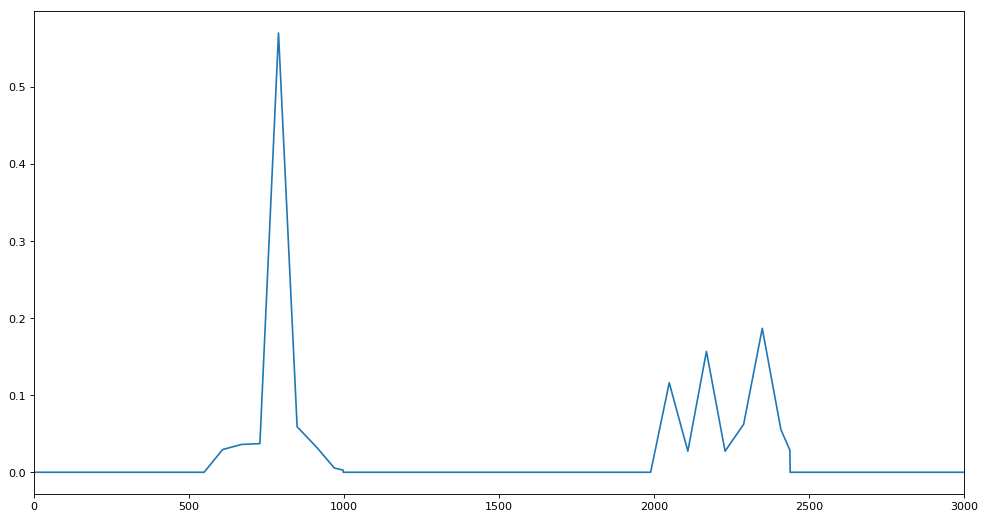

In [103]:
plt.figure(figsize=(15, 8), dpi=80)
total = griddata['Power into grid'][:3000] + solardata['Solar Power used'][:3000]
total.plot()
plt.show()

In [104]:
from datetime import datetime
from datetime import timedelta
dt = [datetime(2016, 1, 1)]
for _ in range(len(total)-1): 
    dt.append(dt[-1] + timedelta(seconds=60))

total = total.to_frame()
total['date'] = dt


In [122]:
total = total.drop('date', axis = 1)

In [127]:
# total.index =  pd.to_datetime(total.date, unit='m')
total = total.resample('H').mean()

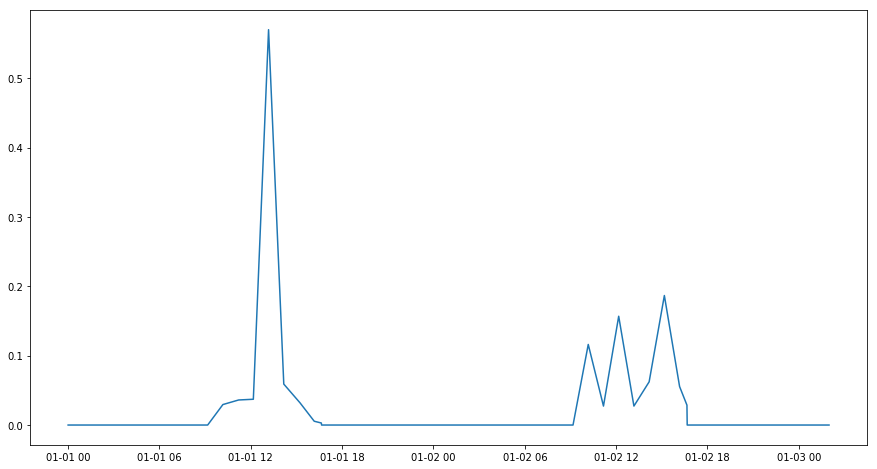

In [101]:
plt.figure(figsize=(15, 8))
plt.plot(total['date'], total[0])

In [54]:
solardata = pd.read_csv(household)

In [59]:
(solardata['Power consumed']/60).sum()

1463.5046774833334